In [21]:
import keras
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Sequential


In [22]:
classifier = Sequential()

# Convolution 
# First argument
# nb_filter - number of convolution filters to use
# number of rows and number of columns
# Konstruowanie feature detectora. 

# 32 feature detectors o wymiarach 3/3

classifier.add(Convolution2D(32, 3, 3, border_mode = 'same', input_shape =(64, 64, 3), 
                            activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
 # Full connection
    
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

# Kompilacja CNN

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', 
                  metrics = ['accuracy'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu", padding="same")`
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`


In [27]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range  = 0.2, 
    zoom_range = 0.2, 
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set =  train_datagen.flow_from_directory('F:/UDEMY/Computer vision/Convolutional_Neural_Networks/dataset/training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'binary')


test_set = test_datagen.flow_from_directory('F:/UDEMY/Computer vision/Convolutional_Neural_Networks/dataset/test_set',
                                           target_size = (64, 64), 
                                           batch_size = 32, 
                                           class_mode = 'binary')

classifier.fit_generator(training_set, 
                   samples_per_epoch = 8000, 
                   nb_epoch = 10, 
                   validation_data = test_set, 
                   nb_val_samples = 2000)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=10, validation_steps=2000)`


250/250 [==============================] - 237s - loss: 0.3505 - acc: 0.8344 - val_loss: 0.5003 - val_acc: 0.7797
Epoch 2/10
250/250 [==============================] - 237s - loss: 0.3549 - acc: 0.8367 - val_loss: 0.4869 - val_acc: 0.7902
Epoch 3/10
250/250 [==============================] - 246s - loss: 0.3479 - acc: 0.8408 - val_loss: 0.4936 - val_acc: 0.7827
Epoch 4/10
250/250 [==============================] - 258s - loss: 0.3505 - acc: 0.8365 - val_loss: 0.5273 - val_acc: 0.7745
Epoch 5/10
250/250 [==============================] - 257s - loss: 0.3641 - acc: 0.8283 - val_loss: 0.5159 - val_acc: 0.7812
Epoch 6/10
250/250 [==============================] - 253s - loss: 0.3534 - acc: 0.8361 - val_loss: 0.5088 - val_acc: 0.7834
Epoch 7/10
250/250 [==============================] - 234s - loss: 0.3512 - acc: 0.8342 - val_loss: 0.5116 - val_acc: 0.7873
Epoch 8/10
250/250 [==============================] - 221s - loss: 0.3448 - acc: 0.8424 - val_loss: 0.5038 - val_acc: 0.7919
Epoch 9/10


In [38]:
from PIL import Image

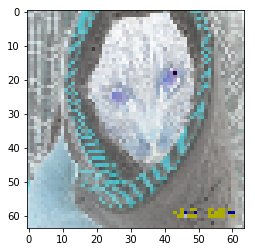

In [62]:
import matplotlib.pyplot as plt

test_image = image.load_img('D:/SAM_5791.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)

plt.imshow(test_image)
plt.show()

In [63]:
import numpy as np 
from keras.preprocessing import image

test_image = image.load_img('D:/SAM_5791.jpg', target_size = (64, 64))
ttest_image = image.img_to_array(test_image)
test_image=  np.expand_dims(test_image, axis = 0)


result = classifier.predict(test_image)
training_set.class_indices



{'cats': 0, 'dogs': 1}

In [64]:
result

array([[ 1.]], dtype=float32)

In [65]:
if result[0][0] ==  1:
    prediction = 'Na zdjeciu jest pies'
else:
    prediction = 'na zdjeciu jest kot'
    

In [66]:
prediction

'Na zdjeciu jest pies'